<a href="https://colab.research.google.com/github/IMI1998/GenderPrediction/blob/main/GenderPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 3.7 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn

%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
genv = pd.read_csv('/content/gender_voice_dataset.csv')

genv_data = pd.DataFrame(genv)
genv_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
genv_data['label'].value_counts()

label
male      1584
female    1584
Name: count, dtype: int64

In [8]:
genv_data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [9]:
le = LabelEncoder()
genv_data['label'] = le.fit_transform(genv_data['label'])
genv_data['label']

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

<Axes: >

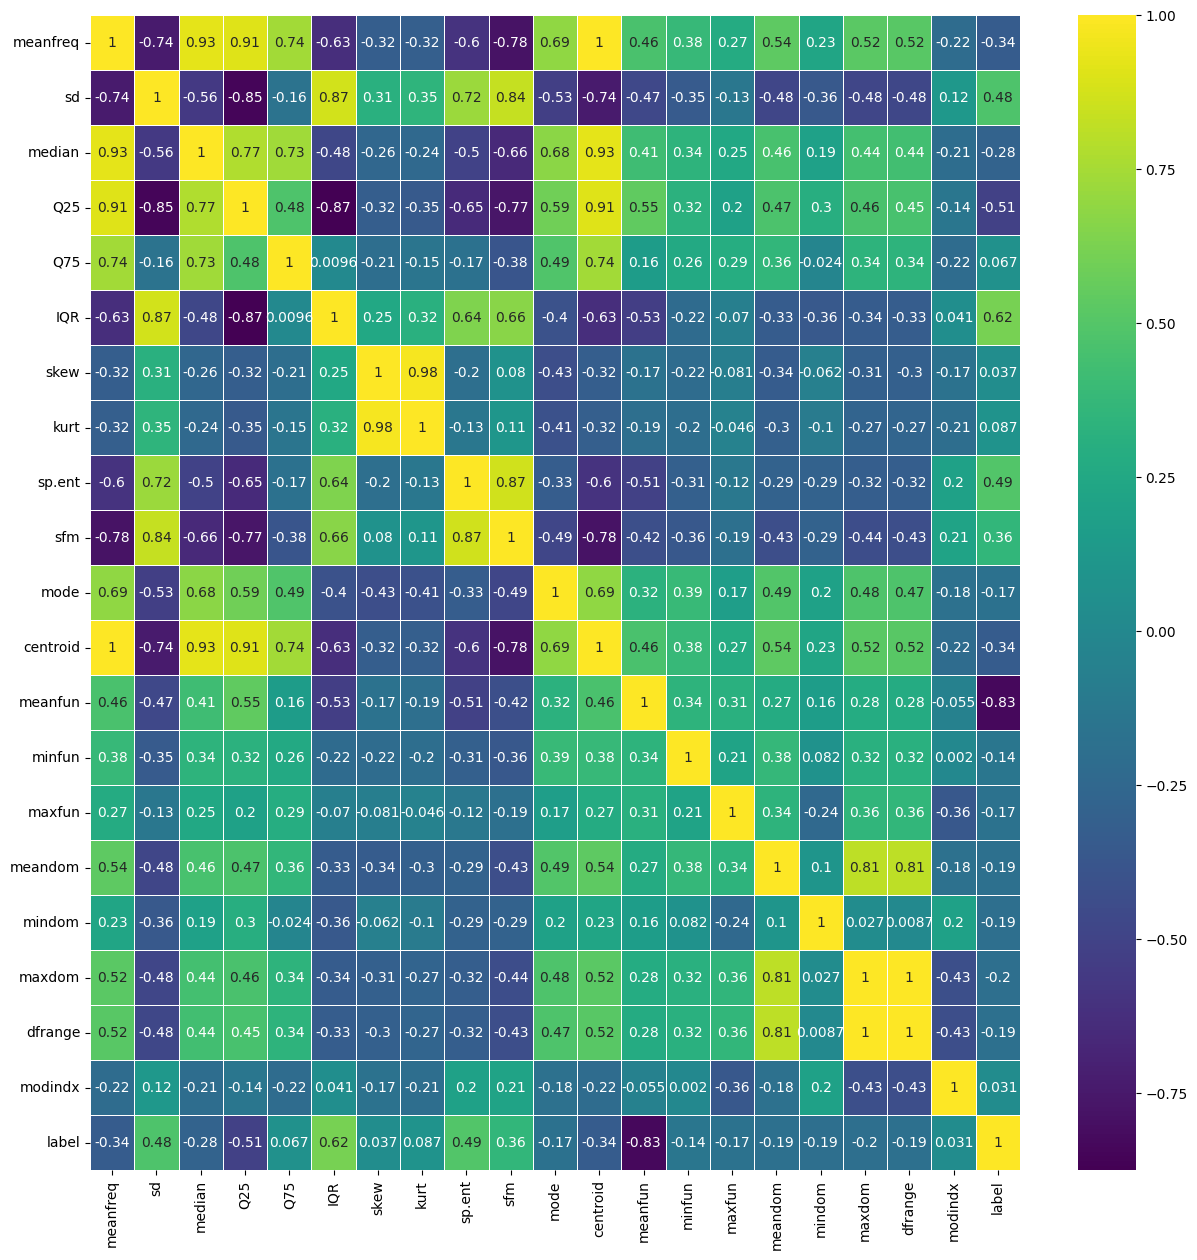

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(genv_data.corr(),annot=True,cmap='viridis',linewidths=.5)

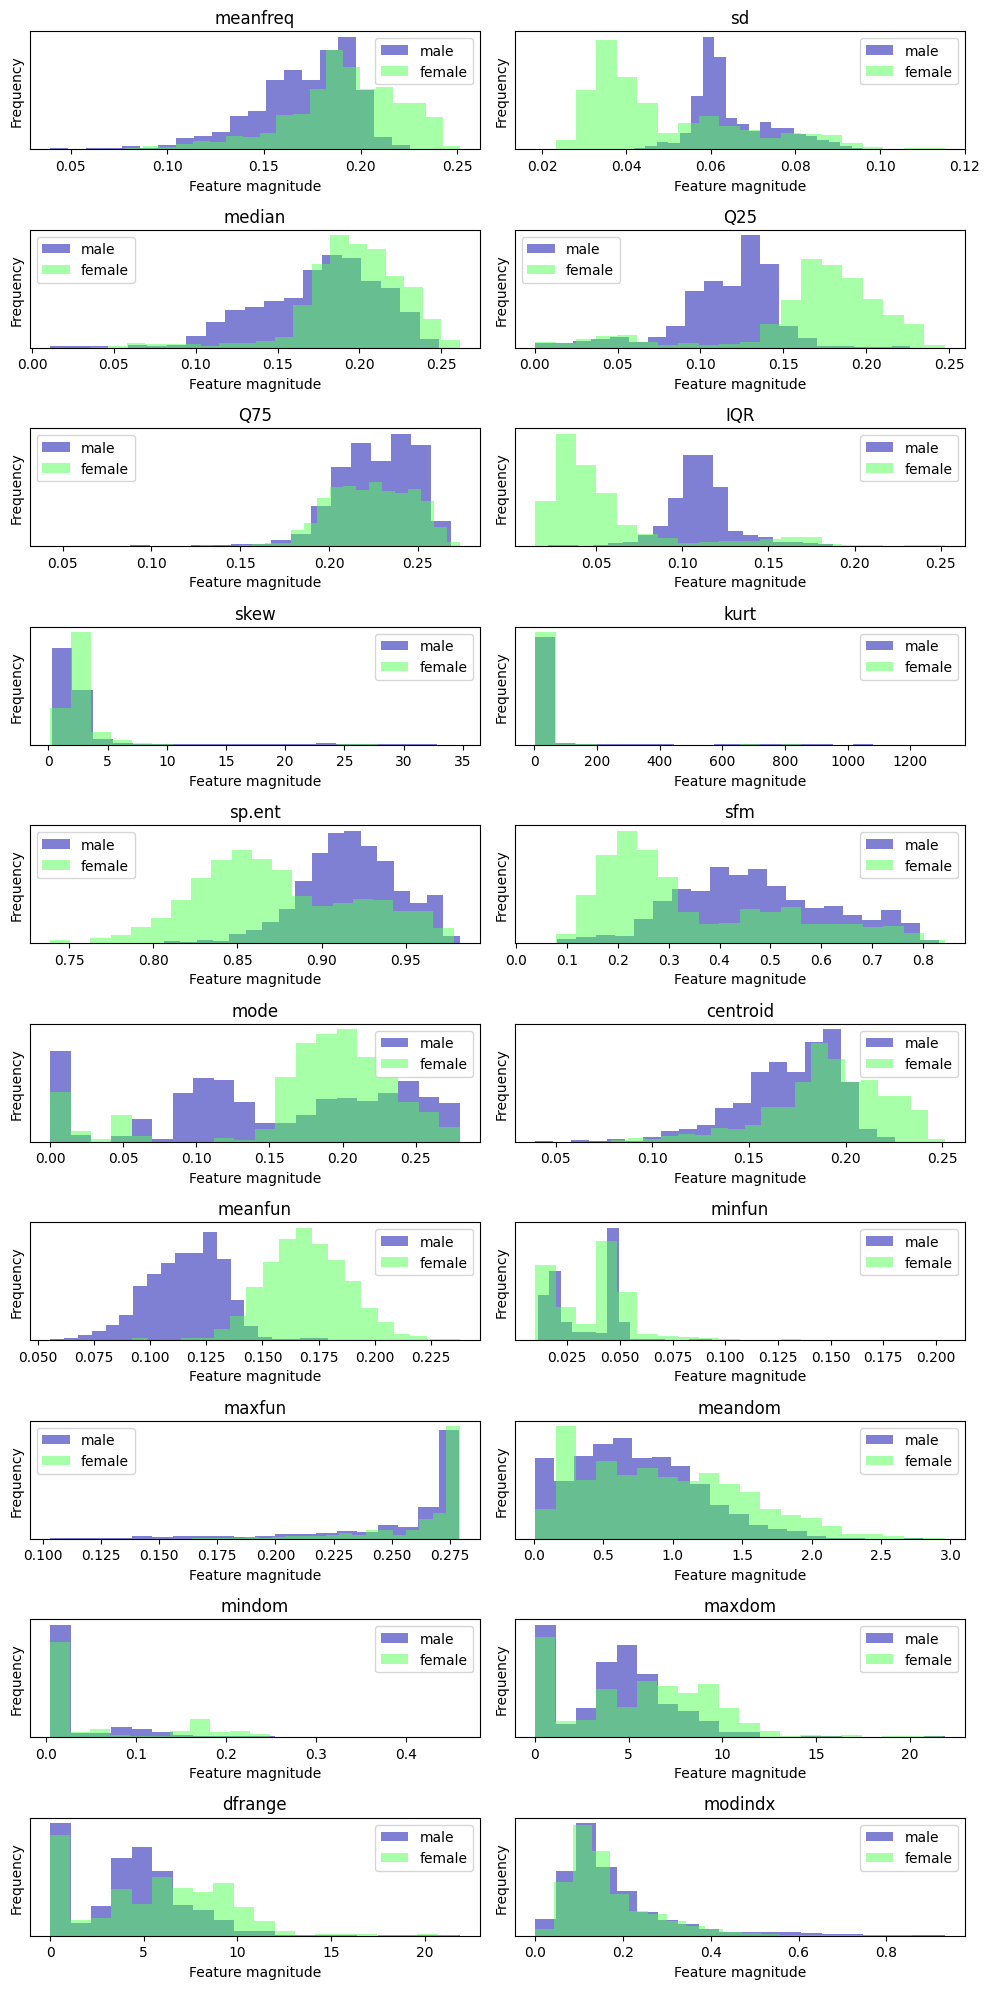

In [19]:
male = genv_data.loc[genv_data['label']==1]
female = genv_data.loc[genv_data['label']==0]
fig, axes = plt.subplots(10, 2, figsize=(10,20))
ax = axes.ravel()
for i in range(20):
    ax[i].hist(male.iloc[:,i], bins=20, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(female.iloc[:, i], bins=20, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(list(male)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["male", "female"], loc="best")

fig.tight_layout()

In [20]:
gen_new = genv_data.drop(['dfrange', 'kurt', 'sfm', 'meandom', 'meanfreq'], axis = 1)

In [21]:
y = gen_new['label']
X = gen_new.drop(['label'], axis = 1)

In [22]:
gen_new['label'].value_counts()

label
1    1584
0    1584
Name: count, dtype: int64

In [23]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [24]:
svm = SVC().fit(Xtrain, ytrain)
print("Support Vector Machine")
print("Accuracy on training set: {:.2f}".format(svm.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(svm.score(Xtest, ytest)))

Support Vector Machine
Accuracy on training set: 0.73
Accuracy on test set: 0.71


In [25]:
forest = RandomForestClassifier(n_estimators=500, random_state=42).fit(Xtrain, ytrain)
print("Random Forests")
print("Accuracy on training set: {:.2f}".format(forest.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(forest.score(Xtest, ytest)))

Random Forests
Accuracy on training set: 1.00
Accuracy on test set: 0.98


In [26]:
import pickle
filename = '/voice_model.pickle'
pickle.dump(forest, open(filename, 'wb'))